# Investigations of Heterogeneity with Limit Cycle Parameters

Goes from Limit Cycle Attractor -> Fixed point attractor in homogeneous case.


In [33]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap
from turbo_colormap import *
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
# Now Import our data from our data folder:

# Get Scorr csv filenames in a folder
Scorr_files = glob.glob("do-not-track/LCycle_G[0.05*Scorr*.csv")
# The last number is of hrs_mins_secs HHMMSS

print(Scorr_files)

['do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-024120_.csv', 'do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-025224_.csv', 'do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-030331_.csv', 'do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-031446_.csv', 'do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-032552_.csv']


In [3]:
SCFC = []
FCFC = []
G_value = []

# Loop to populate the empty array with the numbers from the Scorr csv files:

for item in Scorr_files:
    a = np.genfromtxt(item)
    SCFC.append(a[0])
    FCFC.append(a[2])
    G_value.append(par_extract(item))

print(Scorr_files)
print("SCFC =",SCFC)
print(numpy.amax(SCFC))
print(numpy.where(SCFC==np.amax(SCFC)))
print("FCFC =",FCFC)
print(numpy.amax(FCFC))
print(numpy.where(FCFC==np.amax(FCFC)))

['do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-024120_.csv', 'do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-025224_.csv', 'do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-030331_.csv', 'do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-031446_.csv', 'do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-032552_.csv']
SCFC = [0.47963625473144006, 0.474818272459051, 0.4815238705627436, 0.4663935355471553, 0.46306516031834016]
0.4815238705627436
(array([2], dtype=int64),)
FCFC = [0.2863513782633171, 0.27460480286172706, 0.318852258487704, 0.33785641217188606, 0.34229589127403387]
0.34229589127403387
(array([4], dtype=int64),)


In [4]:
# Graph it: 
plt.plot(np.arange(5)*0.2,FCFC)
plt.xlabel('Sigma', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('Scorr vs Sigma (of Sim vs Exp)', fontsize=20)
plt.grid()
plt.show()

In [5]:
# Now Import our data from our data folder:

# Get Scorr csv filenames in a folder
Scorr_files = glob.glob("do-not-track/LCycle_*Scorr*.csv")
# The last number is of hrs_mins_secs HHMMSS

print(Scorr_files)

['do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-024120_.csv', 'do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-025224_.csv', 'do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-030331_.csv', 'do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-031446_.csv', 'do-not-track\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-032552_.csv', 'do-not-track\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-024114_.csv', 'do-not-track\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-025225_.csv', 'do-not-track\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-030333_.csv', 'do-not-track\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-031441_.csv', 'do-not-track\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-032550_.csv', 'do-not-track\\LCycle_G[0.1]_MouseCortex_Scorr_20200805-024114_.csv', 'do-not-track\\LCycle_G[0.1]_MouseCortex_Scorr_20200805-025227_.csv', 'do-not-track\\LCycle_G[0.1]_MouseCortex_Scorr_20200805-030338_.csv', 'do-not-track\\LCycle_G[0.1]_MouseCortex_Scorr_20200805-031449_.csv', 'do-not-t

In [6]:
# Okay, so we see that it's properly ordered by time (which is also the ordering for sigma) after the G value.  The issue is that G values are not sequential
# First of all, let's take every 5th filename (which corresponds to simulations with equal sigma)
# For S0,S1...S4
Files_S0 = Scorr_files[0::5]
Files_S1 = Scorr_files[1::5]
Files_S2 = Scorr_files[2::5]
Files_S3 = Scorr_files[3::5]
Files_S4 = Scorr_files[4::5]

S0 = SCFC_sort(Files_S0)
S1 = SCFC_sort(Files_S1)
S2 = SCFC_sort(Files_S2)
S3 = SCFC_sort(Files_S3)
S4 = SCFC_sort(Files_S4)

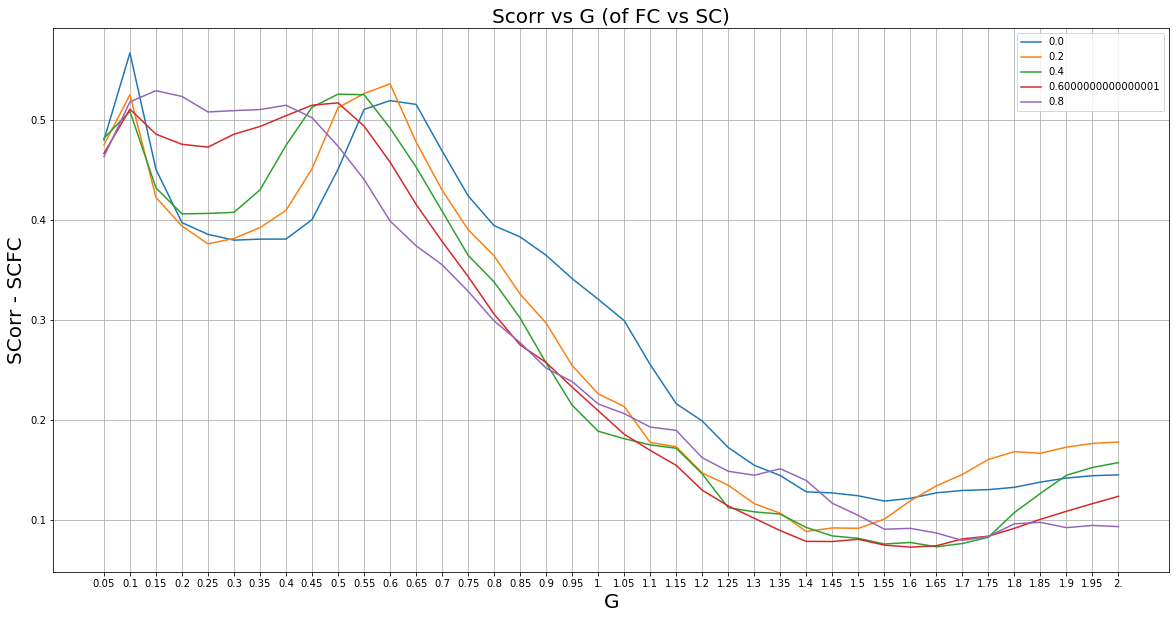

In [23]:
# Graph it: 
plt.plot(S0[0],S0[1])
plt.plot(S1[0],S1[1])
plt.plot(S2[0],S2[1])
plt.plot(S3[0],S3[1])
plt.plot(S4[0],S4[1])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - SCFC', fontsize=20)
plt.title('Scorr vs G (of FC vs SC)', fontsize=20)
plt.grid()
plt.legend(np.arange(start=0,stop=1,step=0.2))
plt.show()

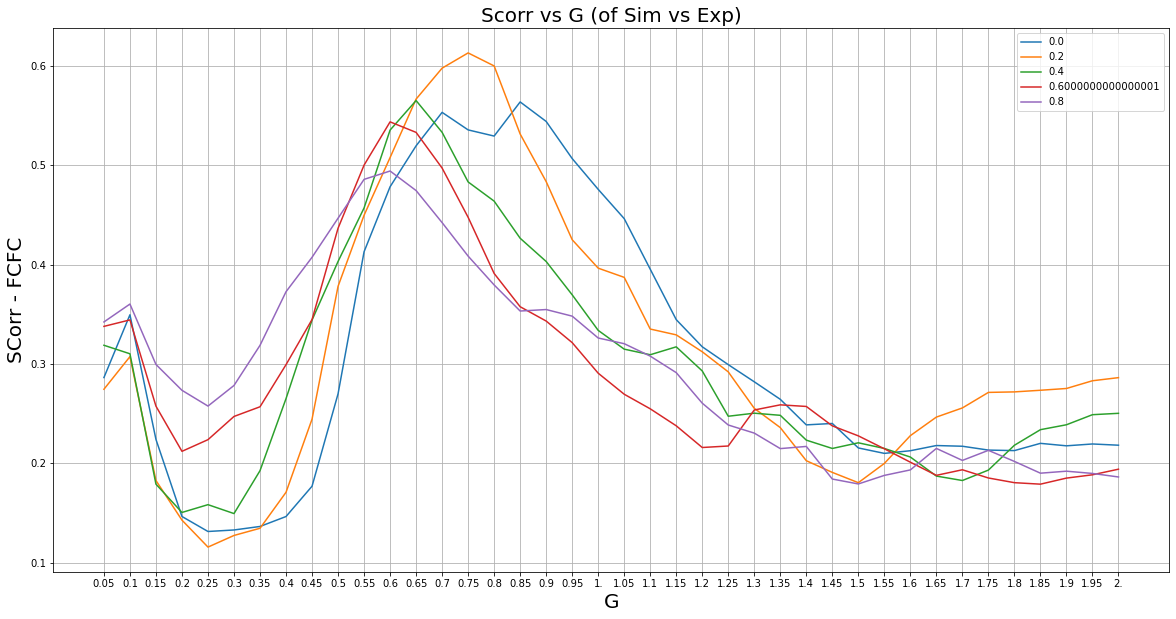

In [25]:
# Graph it: 
plt.plot(S0[0],S0[2])
plt.plot(S1[0],S1[2])
plt.plot(S2[0],S2[2])
plt.plot(S3[0],S3[2])
plt.plot(S4[0],S4[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('Scorr vs G (of Sim vs Exp)', fontsize=20)
plt.grid()
plt.legend(np.arange(5)*0.2)
plt.show()


In [28]:
# Peaks is at: do-not-track\\LCycle_G[0.75]_MouseCortex_Scorr_20200805-031253_.csv

glob.glob("do-not-track/LCycle_G[0.75*Tseries*_.csv")

['do-not-track\\LCycle_G[0.75]_MouseCortex_Tseries_20200805-030655_.csv',
 'do-not-track\\LCycle_G[0.75]_MouseCortex_Tseries_20200805-031253_.csv',
 'do-not-track\\LCycle_G[0.75]_MouseCortex_Tseries_20200805-031852_.csv',
 'do-not-track\\LCycle_G[0.75]_MouseCortex_Tseries_20200805-032449_.csv',
 'do-not-track\\LCycle_G[0.75]_MouseCortex_Tseries_20200805-033047_.csv']

In [31]:
TseriesFile = glob.glob("do-not-track/LCycle_G[0.75*Tseries*_.csv")[1]
ScorrFile = glob.glob("do-not-track/LCycle_G[0.75*SCorr*_.csv")[1]
FCMFile = glob.glob("do-not-track/LCycle_G[0.75*FCM*_.csv")[1]
print(TseriesFile)

do-not-track\LCycle_G[0.75]_MouseCortex_Tseries_20200805-031253_.csv


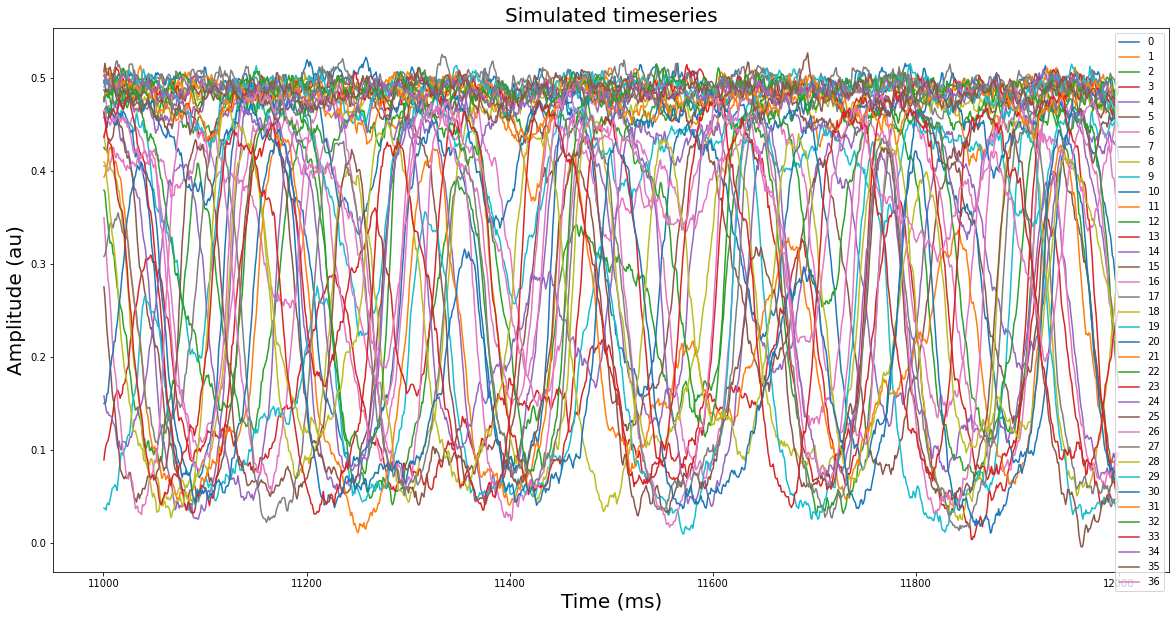

In [46]:
# Empty dict
ParamsDict = { }
ParamsDict["name"] = "MouseCortex"
#ParamsDict["G"] = np.array([1.9]) 
ParamsDict["REMOVE"] = [7]
ParamsDict["BINARY"]=True

# Read file import data
#df = pd.read_csv(all_files[11],delimiter="\t",header=None)
# Genfromtxt gives us a np array. 
df = np.genfromtxt(TseriesFile,delimiter="\t")

bold_time = df[0]
bold_data = df[1:]

# plt.subplots()

#plt.figure(num=None, figsize=(60, 30), dpi=80, facecolor='w', edgecolor='k')
for tseries in bold_data:
    plt.plot(bold_time[10000:11000],tseries[10000:11000])

plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Amplitude (au)', fontsize=20)
plt.title('Simulated timeseries', fontsize=20)
#plt.legend(('0','1','2','3','4'))
plt.legend(range(38))
plt.show()

In [40]:
# Get rough feel for external currents.
# Load the connectivity data from a zip file. 
con = connectivity.Connectivity.from_file(os.getcwd() +"/Connectomes/" + ParamsDict["name"] + ".zip")

# Remove the ith row and column in centres, tract_lengths and weights. i.e. the specified region(s)
con.centres = np.delete(con.centres,ParamsDict["REMOVE"])
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=0)
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=1)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=0)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=1)

if ParamsDict["BINARY"]==True:
    con.weights = con.weights!=0
SCM = con.weights

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


Max 7.222981982697547
Median 2.9364690340645945
Min 0.715711306923329


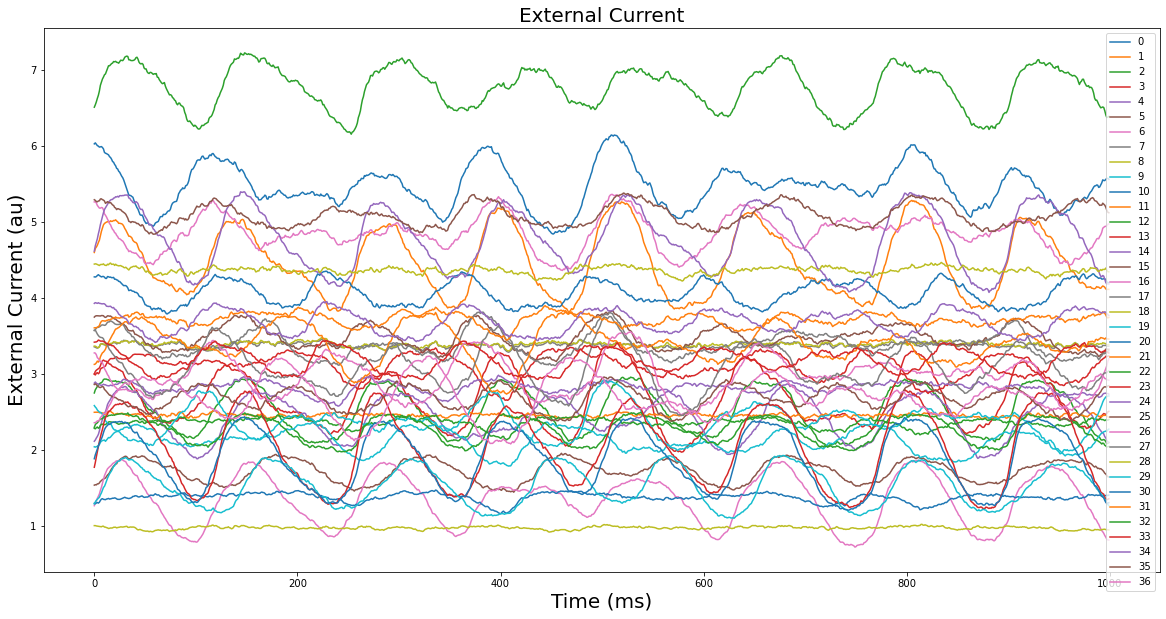

In [41]:
# External Current Calculator:
J_e = []
#len(bold_time)
for j in np.arange(1000):       
    t_0 = []
    # Specific column (or time point)
    for i in np.arange(SCM.shape[0]): 
        # Sum over all external currents (May need to do SCM[:,i] instead)  
        t  = sum(bold_data[:,j]*SCM[:,i])
        # To obtain currents to particular region
        t_0.append(t)
    J_e.append(t_0)

J_e = np.array(J_e)
print("Max",np.max(J_e))
print("Median",np.median(J_e))
print("Min",np.min(J_e))

plt.plot(J_e)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('External Current (au)', fontsize=20)
plt.title('External Current', fontsize=20)
#plt.legend(('0','1','2','3','4'))
plt.legend(range(38))
plt.show()

[3.89997024e-01 1.25038967e-49 6.12983063e-01 5.77582049e-70]


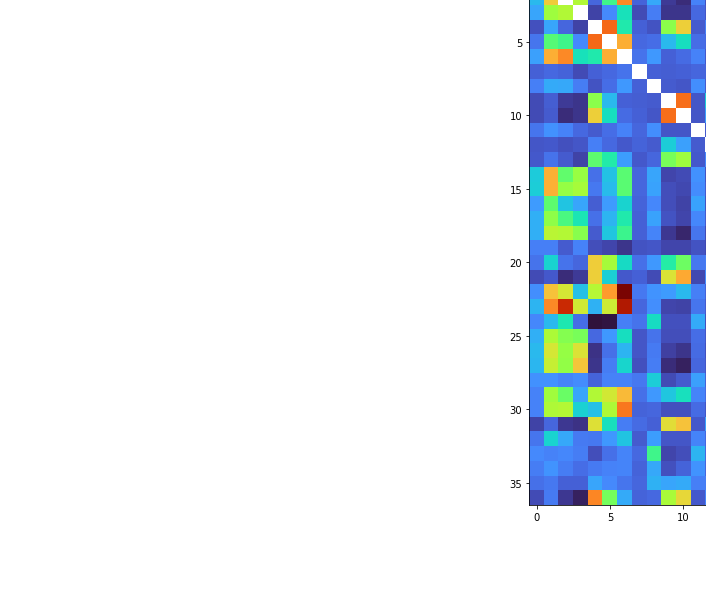

In [42]:
Scorra = np.genfromtxt(ScorrFile)
print(Scorra)

# Plot Simulated FCM
FCM_sim = np.genfromtxt(FCMFile,delimiter="\t")

# ListedColormap(turbo_colormap_data)
cs=plt.imshow(FCM_sim, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none')
plt.title('Functional connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Correlation', fontsize=20)
#plt.yticks([0,1,2,3])
plt.show()

In [38]:
FCM_exp = np.genfromtxt('FCM_MouseExperimental.csv',delimiter = "\t")
# Set diagonals to NaN
np.fill_diagonal(FCM_exp,np.nan)

# Remove the ith row and column in FCM (i.e. the specified region)
FCM_exp = np.delete(FCM_exp,obj=ParamsDict["REMOVE"],axis=0)
FCM_exp = np.delete(FCM_exp,obj=ParamsDict["REMOVE"],axis=1)

FCM_Exp_U = FCM_exp[np.triu_indices(FCM_exp.shape[0], k = 1)]
FCM_Sim_U = FCM_sim[np.triu_indices(FCM_sim.shape[0], k = 1)]

# Spearman Correlation
SCorr = stats.spearmanr(a=FCM_Exp_U,b=FCM_Sim_U)
#print(SCorr)

# Scatterplot
plt.scatter(FCM_Exp_U,FCM_Sim_U)
plt.xlabel('FCM_exp', fontsize=20)
plt.ylabel('FCM_sim', fontsize=20)
plt.title('FCM_sim vs FCM_exp', fontsize=20)
plt.annotate(SCorr, xy=(0.05, 0.95), xycoords='axes fraction')
plt.show()